#  Task 3:  Forest Cover Type Classification
## 1. Introduction

This notebook predicts forest cover types using cartographic and environmental features. Data was cleaned, preprocessed, and modeled using tree-based multi-class classification techniques.

In [1]:
!pip install xgboost


## 2. Import Libraries and load Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("covtype.csv")


## 3. Preprocessing 

In [4]:
print("Dataset shape:", df.shape)


Dataset shape: (581012, 55)


In [5]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
(df.describe())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


for missing values:

## 4. Data Cleaning

In [8]:
print("Missing per column:\n", df.isnull().sum().sum())

Missing per column:
 0


In [9]:
print("\nDuplicate rows:", df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)


Duplicate rows: 0


In [10]:
print("\nFirst 5 rows:")
(df.head())


First 5 rows:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [11]:
from sklearn.datasets import fetch_covtype
data = fetch_covtype()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
df = pd.concat([X, y.rename("Cover_Type")], axis=1)

In [12]:
print(df.isnull().sum())


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


In [13]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]


- seperate features and target

In [14]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]


Scale numeric features (optional, helps some models)

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 Encode target

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


## 5. Training and Spliting 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
from sklearn.model_selection import train_test_split




### 1. Random Forest

Random Forest Accuracy: 0.953245613280208
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.94      0.96      0.95      7151
           3       0.92      0.86      0.89       549
           4       0.95      0.77      0.85      1899
           5       0.93      0.89      0.91      3473
           6       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



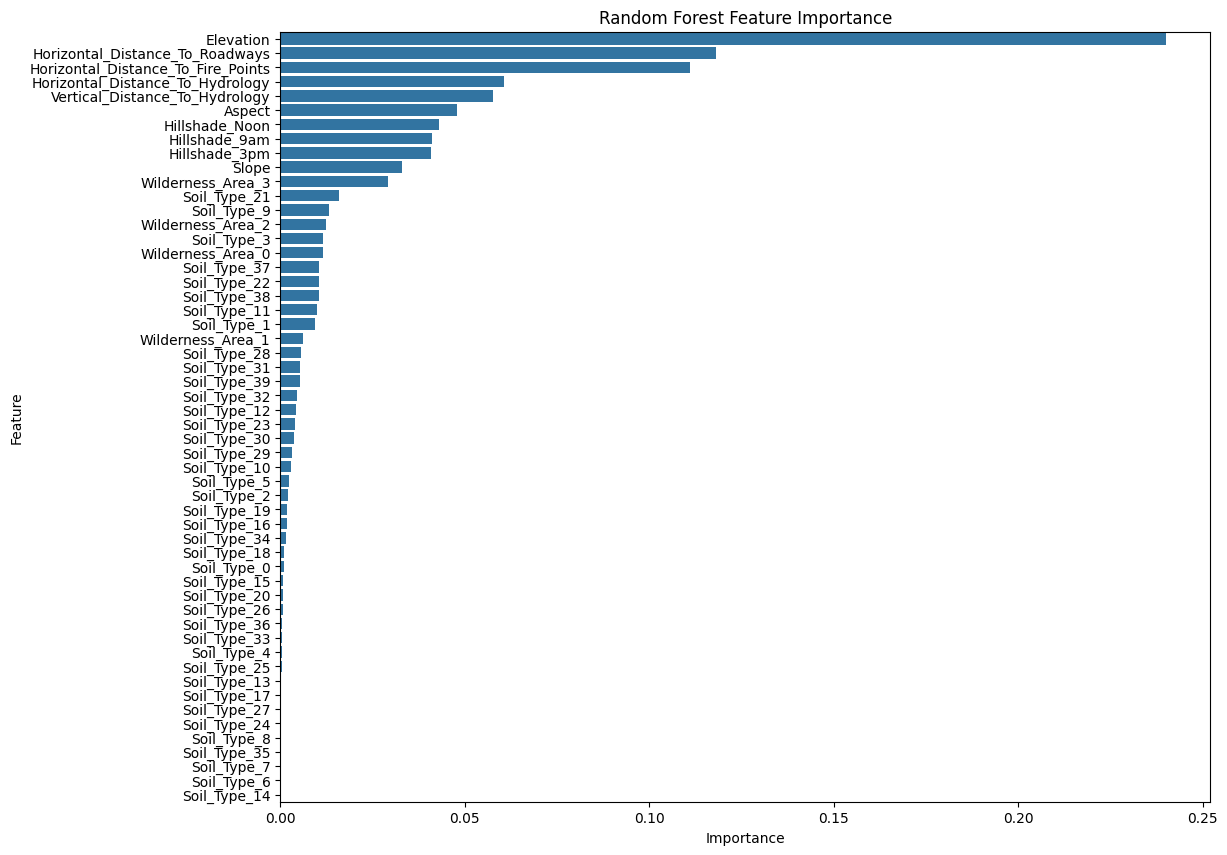

In [18]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature Importance (Random Forest)
importances = rf.feature_importances_
features = X.columns
feat_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12,10))
sns.barplot(x="Importance", y="Feature", data=feat_df)
plt.title("Random Forest Feature Importance")
plt.show()

### 2. XGboost

XGBoost Accuracy: 0.8696074972246843
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42368
           1       0.87      0.90      0.88     56661
           2       0.89      0.91      0.90      7151
           3       0.88      0.86      0.87       549
           4       0.89      0.61      0.72      1899
           5       0.85      0.80      0.82      3473
           6       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



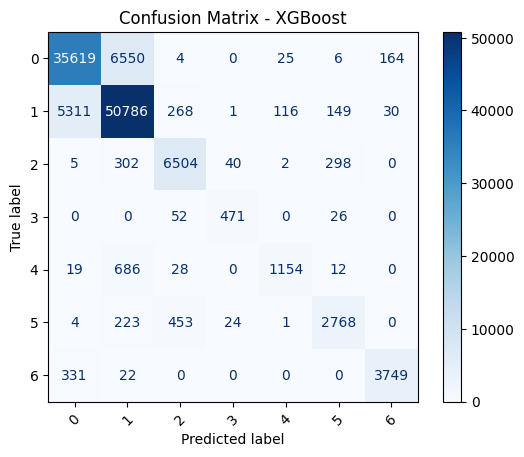

In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train XGBoost without 'use_label_encoder'
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Confusion Matrix for XGBoost
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - XGBoost")
plt.show()



## Confusion Matrix Visualization

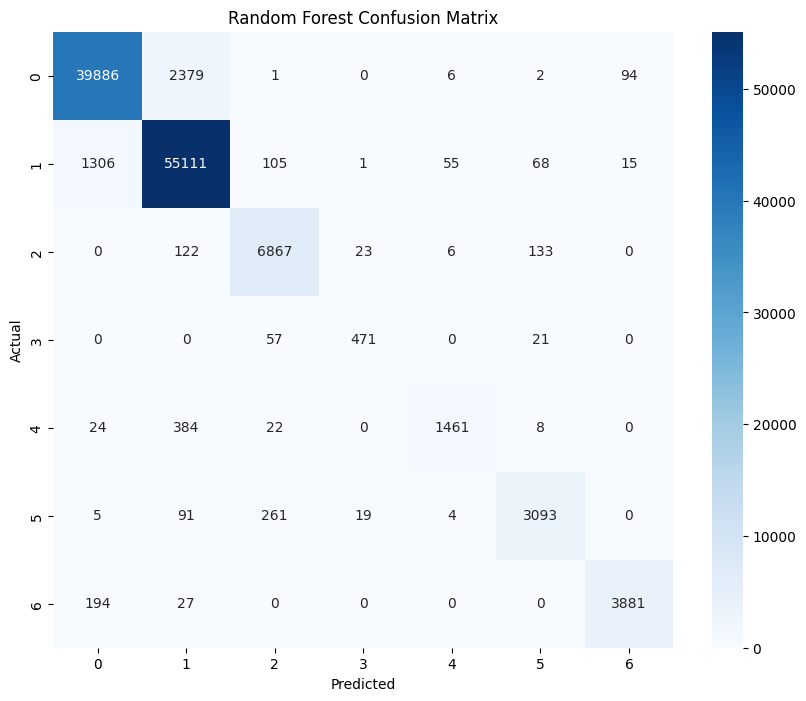

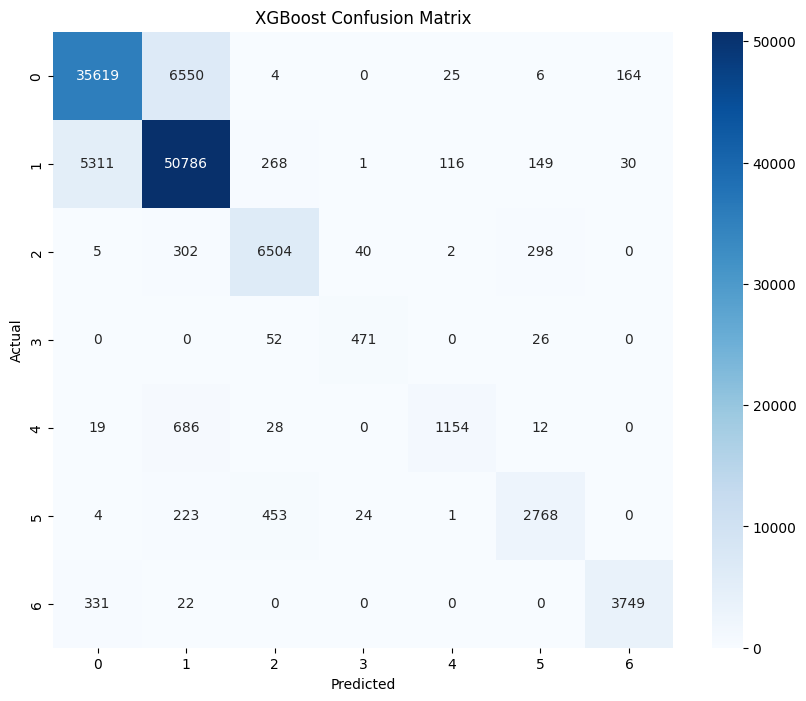

In [20]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion(y_test, y_pred_rf, "Random Forest Confusion Matrix")
plot_confusion(y_test, y_pred_xgb, "XGBoost Confusion Matrix")


## Feature Importance
### Random Forest Feature Importance

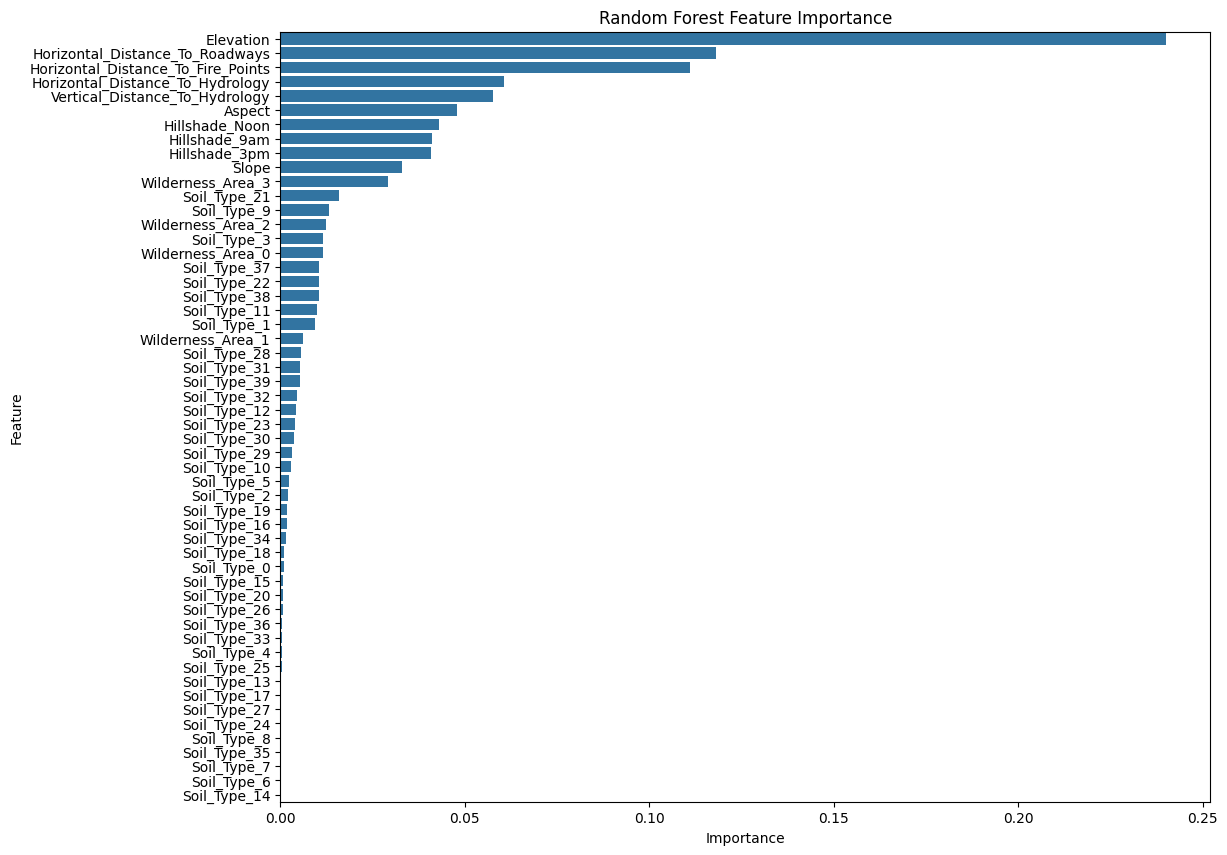

In [21]:
importances = rf.feature_importances_
features = X.columns
feat_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False)
# Plot only top 20 features
top_feat = feat_df.head(20)

plt.figure(figsize=(12,10))
sns.barplot(x="Importance", y="Feature", data=feat_df)
plt.title("Random Forest Feature Importance")
plt.show()


## Hyperparameter Tuning (Optional / Bonus)
### Example: Random Forest

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV (fast and Windows-safe)
rand_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,        # number of random combinations
    cv=3,
    n_jobs=1,         # important for Windows
    verbose=2,
    random_state=42
)

# Fit on training data
rand_search.fit(X_train, y_train)

# Best model
best_rf = rand_search.best_estimator_

# Predictions on test set
y_pred_best = best_rf.predict(X_test)

# Evaluation
print("Best RF Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Parameters:", rand_search.best_params_)
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.7min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.3min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.1min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.2min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 4.1min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 4.1min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 4.0min
[CV] END max_depth=20, min_sam

In [23]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Compare Models
results = {
    "Logistic Regression": accuracy_score(y_test, log_reg.predict(X_test)),
    "Random Forest": accuracy_score(y_test, rf.predict(X_test)),
    "XGBoost": accuracy_score(y_test, xgb.predict(X_test))
}

# Convert to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print("Model Comparison:\n", results_df)


Model Comparison:
                  Model  Accuracy
0  Logistic Regression  0.723389
1        Random Forest  0.953246
2              XGBoost  0.869607


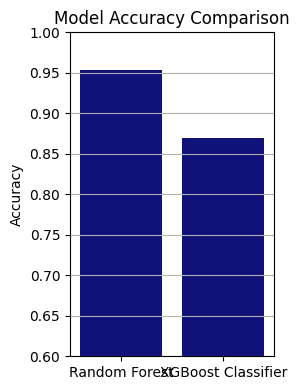

In [25]:
 # Accuracy Comparison between Random Forest & XGBoost

plt.figure(figsize=(3, 4))
sns.barplot(
    x=["Random Forest", "XGBoost Classifier"],
    y=[accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)],
    color="darkblue"
)
plt.ylim(0.6, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

,Feature,Importance
0,Elevation,0.240072
5,Horizontal_Distance_To_Roadways,0.118071
9,Horizontal_Distance_To_Fire_Points,0.110950
3,Horizontal_Distance_To_Hydrology,0.060759
4,Vertical_Distance_To_Hydrology,0.057779


C:\Users\Administrator\AppData\Local\Temp\ipykernel_21048\2877297319.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="cividis")


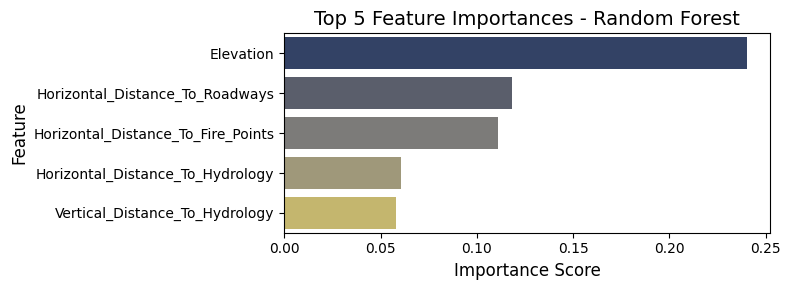

,Feature,Importance
0,Elevation,0.092647
10,Wilderness_Area_0,0.058123
35,Soil_Type_21,0.050163
45,Soil_Type_31,0.047508
15,Soil_Type_1,0.047059


C:\Users\Administrator\AppData\Local\Temp\ipykernel_21048\2877297319.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="plasma")


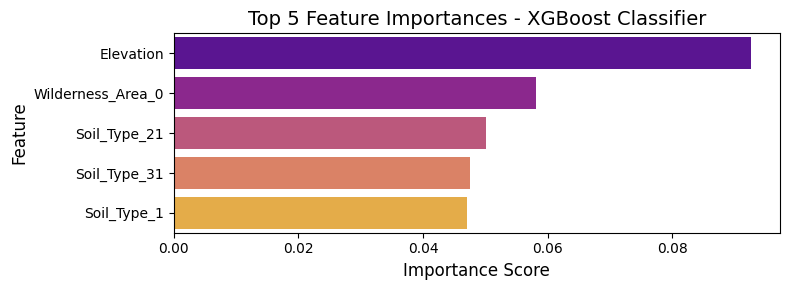

In [26]:
# Feature importance - Random Forest 

importances = rf.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False).head(5)
display(feat_imp)
plt.figure(figsize=(8,3))
sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="cividis")
plt.title("Top 5 Feature Importances - Random Forest", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

# Feature importance - XGBoost 

importances = xgb.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False).head(5)
display(feat_imp)
plt.figure(figsize=(8,3))
sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="plasma")
plt.title("Top 5 Feature Importances - XGBoost Classifier", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
# Save trained models
import joblib
joblib.dump(rf, "random_forest_model.pkl")
joblib.dump(xgb, "xgboost_model.pkl")
# Save scaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

Later, you can load and predict using:

loaded_model = joblib.load("random_forest_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")
X_new_scaled = loaded_scaler.transform(X_new)
predictions = loaded_model.predict(X_new_scaled)


## Task Completion Checklist

- Loaded and cleaned the Covertype dataset

- Handled categorical and numerical feature preprocessing

- Trained multi-class classification models (Random Forest, XGBoost)

- Evaluated model performance using accuracy and confusion matrix

- Visualized feature importance for key predictors

- Compared model performances and tuned hyperparameters